In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns

## Linear Regression

In [2]:
# fuel efficiency dataset
df_cars = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')

#import seaborn as sns
#df_cars = sns.load_dataset('mpg')

df_cars.dropna(inplace=True)

In [3]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Which variables might have a linear relationship? Which definitely do not?

In [4]:
# scatter plot


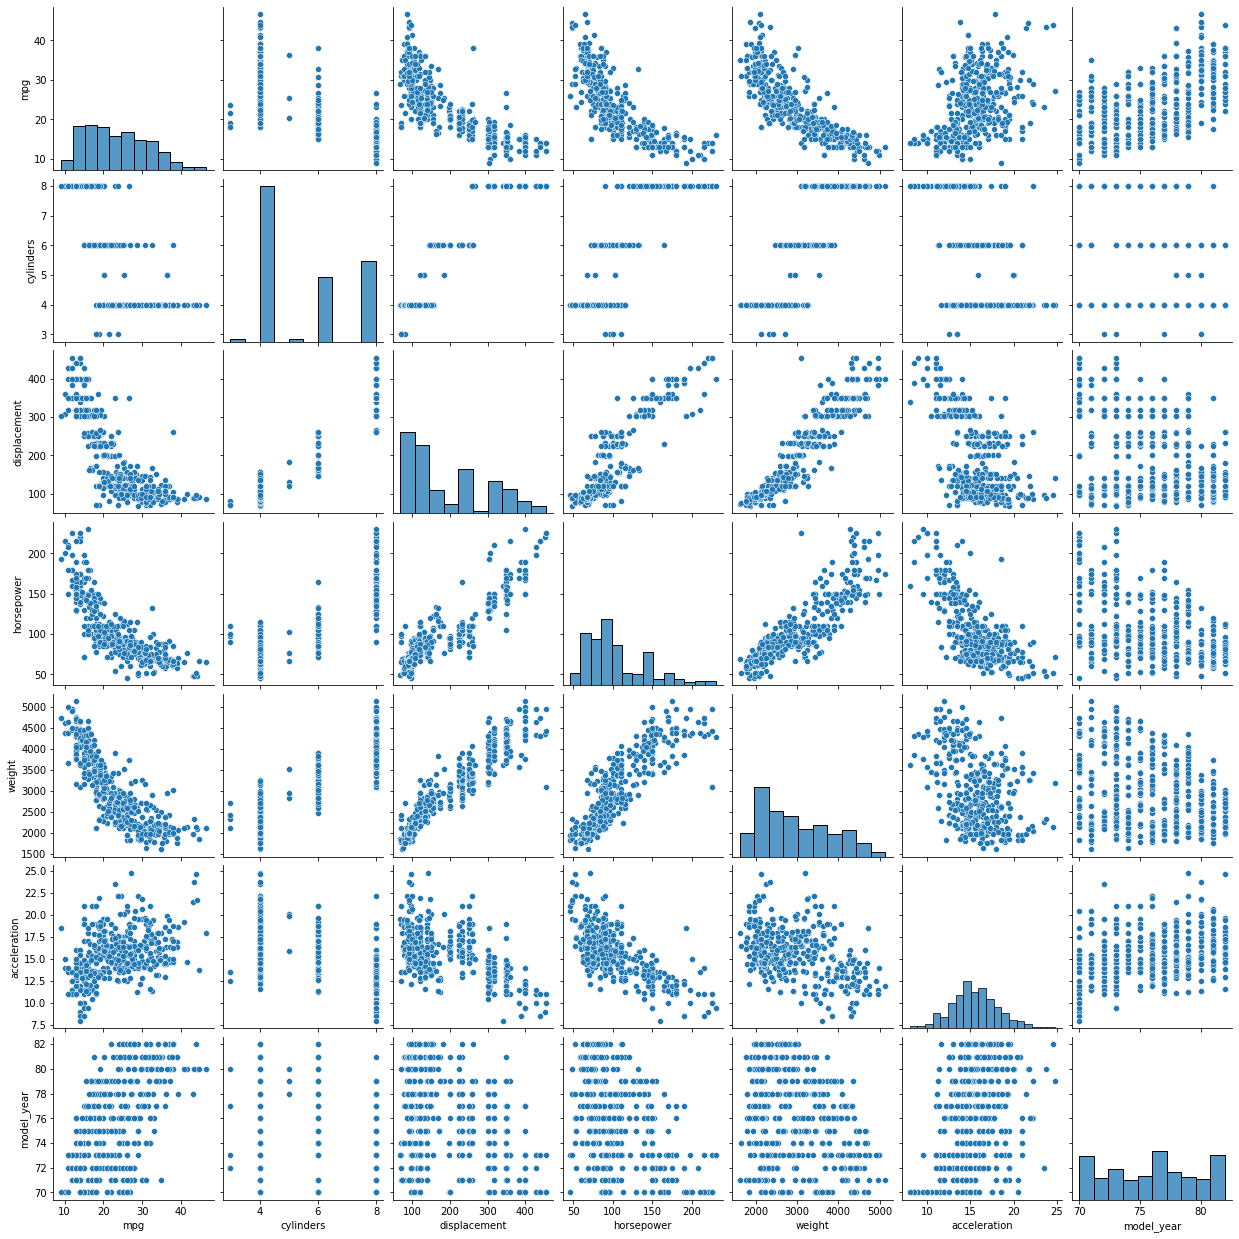

In [5]:
# try using seaborn's pairplot feature!
import seaborn as sns
sns.pairplot(df_cars)

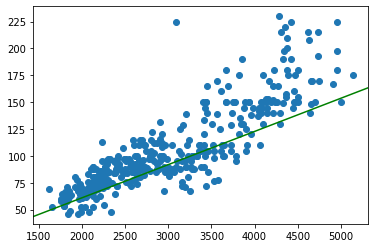

In [6]:
plt.scatter(x=df_cars['weight'], y=df_cars['horsepower'])

# pick out two random points
idx1 = np.random.randint(low=1, high=len(df_cars)+1, size=1)
idx2 = np.random.randint(low=1, high=len(df_cars)+1, size=1)

# use .item() to get just the value not a Series object
x1 = df_cars.loc[idx1, 'weight'].item()
y1 = df_cars.loc[idx1, 'horsepower'].item()
x2 = df_cars.loc[idx2, 'weight'].item()
y2 = df_cars.loc[idx2, 'horsepower'].item()


# plot a line through two points
plt.axline((x1, y1), (x2, y2), color='green')

plt.show()

How can we decide how "well" a line fits our data? How about a particular datapoint?

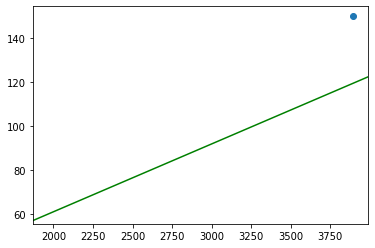

In [8]:
# another random point
idx3 = np.random.randint(low=1, high=len(df_cars)+1, size=1)

# use .item() to get just the value not a Series object
x3 = df_cars.loc[idx3, 'weight'].item()
y3 = df_cars.loc[idx3, 'horsepower'].item()

plt.scatter(x=x3, y=y3)

plt.axline((x1, y1), (x2, y2), color='green')
plt.show()

Denote our line as:

$$
Y = \beta_0 + \beta_1 X
$$

For a particular $(x,y)$ we denote the prediction as

$$
\hat{y} = \beta_0 + \beta_1 x,
$$

and then the error between the true value and the prediction as

$$
(\hat{y} - y)^2 = ((\beta_0 + \beta_1 x) - y)^2.
$$

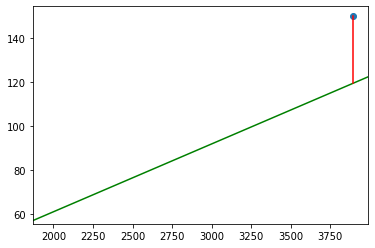

In [9]:
plt.scatter(x=x3, y=y3)
plt.axline((x1, y1), (x2, y2), color='green')

# plot the prediction vs. the true value
m = (y2 - y1) / (x2 - x1)
y_pred = m * (x3 - x1) + y1
plt.plot([x3,x3], [y3, y_pred], color='red')

plt.show()

How would we get the error for the whole line?

The **R**esidual **S**um of **S**quares for a particular line with coefficents $\hat{\beta}_0$ and $\hat{\beta}_1$:
$$
RSS = \displaystyle \sum_{i=1}^N(\hat{y}_i-y_i)^2 = \sum_{i=1}^N((\hat{\beta}_0+\hat{\beta}_1 x_i)-y_i)^2
$$


In [10]:
# the error for this particular line

def y_pred_line(x, m, b):
    return m*x+b
    
m = (y2 - y1) / (x2 - x1) # slope
b = y1 - m * x1 # intersept

# zip lets us loop over two iterables
sq_errors = []
for x, y in zip(df_cars['weight'], df_cars['horsepower']):
    sq_errors.append((y_pred_line(x, m, b) - y)**2)

RSS = sum(sq_errors)
RSS

234925.33212253888

In [11]:
MSE = RSS / len(df_cars)
MSE

599.2993166391298

Goal: Find $\beta_0$ and $\beta_1$ such that the $RSS$ is as small as possible.

Let's bring in some back-up.

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

```statsmodel``` is a nice package for statistical modeling. We'll import the ```ols``` or Ordinary Least Squares function.

The dependent variable (or $Y$) appears on the left. It has to be a column from your data frame, in this case ```horsepower```. The ```~``` tells us that we are writing $Y$ as a function of the variables that come next. Since we're doing simple ```ols``` with only one independent predictor variable (or $X$), the next variable ```weight``` completes the model specification. Finally, we point to the dataframe we're using.

In [13]:
model = ols(formula = 'horsepower ~ weight', data=df_cars)

In [14]:
# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.36e-118
Time:                        21:05:06   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is all of this?!
- For now pay attention to the coefficients parameters.
- How do we interpret them as a line? How about in non-statistical language?

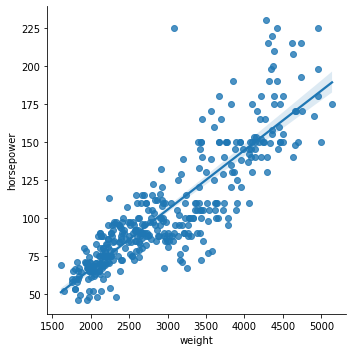

In [15]:
# seaborn also calculates and plots the linear regression line from OLS
# the shaded region is a 95% confidence interval
import seaborn as sns
sns.lmplot(x='weight',y='horsepower',data=df_cars)